In [1]:
# Cargando librerias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.optimize import curve_fit
font=FontProperties()
font.set_family('serif')
font.set_style('normal')

In [3]:
#Plots Teluro de Cadmio CNR vs Diametro para (200um, 500um y 1000um)

In [4]:
#===== loading Data =======
data=np.loadtxt('datosCNRCdTe1000um.txt')
data2=np.loadtxt('datosCNRCdTe500um.txt')
data3=np.loadtxt('datosCNRCdTe200um.txt')

In [5]:
#====== Cargando Datos ===========

In [6]:
x1=data[:,0]
ex1=data[:,1]
y1=data[:,2]
ey1=data[:,3]

x2=data2[:,0]
ex2=data2[:,1]
y2=data2[:,2]
ey2=data2[:,3]

x3=data3[:,0]
ex3=data3[:,1]
y3=data3[:,2]
ey3=data3[:,3]

In [7]:
# Definimos la funcion para la regresion

In [8]:
def reg_lin(x,a,b):
    return a+b*x

In [9]:
# Obtenemos los parametros del fit

In [10]:
pars,cov=curve_fit(f=reg_lin,xdata=x1,ydata=y1,sigma=ey1,p0=[0,0],bounds=(-np.inf,np.inf),absolute_sigma=True)
p2pars,cov2=curve_fit(f=reg_lin,xdata=x2,ydata=y2,sigma=ey2,p0=[0,0],bounds=(-np.inf,np.inf),absolute_sigma=True)
p3pars,cov3=curve_fit(f=reg_lin,xdata=x3,ydata=y3,sigma=ey3,p0=[0,0],bounds=(-np.inf,np.inf),absolute_sigma=True)
stdevs=np.sqrt(np.diag(cov))
stdevs2=np.sqrt(np.diag(cov2))
stdevs3=np.sqrt(np.diag(cov3))

In [11]:
# Definimos incertidumbres de los parametros

In [12]:
d_a=np.sqrt(cov[0][0])
d_b=np.sqrt(cov[1][1])

d_a2=np.sqrt(cov2[0][0])
d_b2=np.sqrt(cov2[1][1])

d_a3=np.sqrt(cov3[0][0])
d_b3=np.sqrt(cov3[1][1])

In [13]:
# Calculamos los chi^2/dof

In [14]:
chisqr=sum((y1-reg_lin(x1,pars[0],pars[1]))**2/ey1**2)
dof = len(y1) - 2

chisqr2=sum((y2-reg_lin(x2,p2pars[0],p2pars[1]))**2/ey2**2)
dof2 = len(y2) - 2

chisqr3=sum((y3-reg_lin(x3,p3pars[0],p3pars[1]))**2/ey3**2)
dof3 = len(y3) - 2

print(f' chi^2/dof 1000um = {chisqr}/{dof}')
print(f' chi^2/dof 500 um = {chisqr2}/{dof2}')
print(f' chi^2/dof 200 um = {chisqr3}/{dof3}')

 chi^2/dof 1000um = 11.257521485426409/10
 chi^2/dof 500 um = 9.911635724315182/10
 chi^2/dof 200 um = 13.760427570530135/10


In [15]:
#Creando subplots

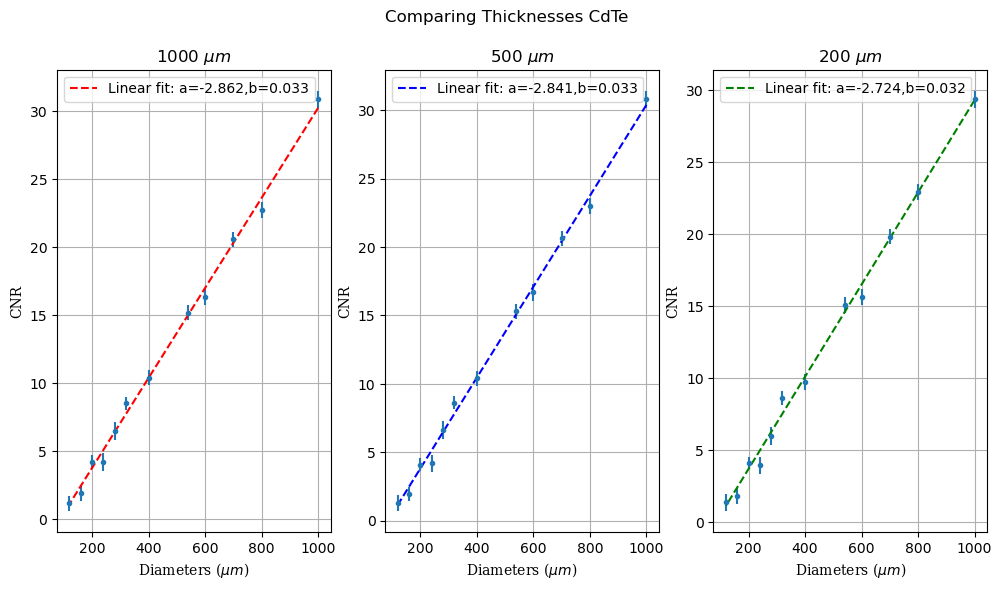

In [16]:
fig,(ax0,ax1,ax2)=plt.subplots(nrows=1, ncols=3, sharex=True,figsize=(12,6))

ax0.set_title('1000 $\mu m$')
ax0.errorbar(x1,y1,yerr=ey1,marker='.',linestyle='none')


ax1.set_title('500 $\mu m$')
ax1.errorbar(x2,y2,yerr=ey2,marker='.',linestyle='none',)

ax2.set_title('200 $\mu m$')
ax2.errorbar(x3,y3,yerr=ey3,marker='.',linestyle='none',)

fig.suptitle('Comparing Thicknesses CdTe')
ax0.plot(x1,reg_lin(x1,pars[0],pars[1]),linestyle='dashed',color='red',label='Linear fit: a=%5.3f,b=%5.3f' % tuple(pars))
ax1.plot(x2,reg_lin(x2,p2pars[0],p2pars[1]),linestyle='dashed',color='blue',label='Linear fit: a=%5.3f,b=%5.3f' % tuple(p2pars))
ax2.plot(x3,reg_lin(x3,p3pars[0],p3pars[1]),linestyle='dashed',color='green',label='Linear fit: a=%5.3f,b=%5.3f' % tuple(p3pars))

for ax in ax0,ax1,ax2:
    ax.grid(True)
    ax.set_xlabel('Diameters ($\mu m$)',fontproperties=font)
    ax.set_ylabel('CNR',fontproperties=font)
    ax.legend()